In [1]:
#import data
import numpy as np
import pandas as pd
CombinedDataFrame = pd.read_csv("CombinedDataFrame.csv",index_col=["symbol","date"],parse_dates=["date"])

# Pair Plots

In [2]:
CombinedDataFrame

deferredIncomeTax  stockBasedCompensation  \
symbol date                                                    
CMCSA  2021-09-30             1847.0                  2055.0   
       2021-06-30             1850.0                  2056.0   
       2021-03-31             1657.0                  2057.0   
       2020-12-31               20.0                  2053.0   
       2020-09-30               45.0                  2055.0   
...                              ...                     ...   
STC.V  2003-12-31              875.0                    56.0   
       2003-09-30              878.0                    56.0   
       2003-06-30              849.0                    56.0   
       2003-03-31              849.0                    56.0   
       2002-12-31              849.0                    56.0   

                   changeInWorkingCapital  accountsReceivables  \
symbol date                                                      
CMCSA  2021-09-30                    48.0                937.0   
       2021-06-30                  3101.0                937.0   
       2021-03-31                  4479.0                937.0   
       2020-12-31                   269.0                937.0   
       2020-09-30                    72.0                937.0   
...                                   ...                  ...   
STC.V  2003-12-31                  2297.0                937.0   
       2003-09-30                  2280.0                937.0   
       2003-06-30                  2635.0                937.0   
       2003-03-31                  2125.0                937.0   
       2002-12-31                  2242.0                937.0   

                   netCashProvidedByOperatingActivities  acquisitionsNet  \
symbol date                                                                
CMCSA  2021-09-30                                4785.0            295.0   
       2021-06-30                                4794.0             67.0   
       2021-03-31                                4795.0             90.0   
       2020-12-31                                4776.0             93.0   
       2020-09-30                                4777.0             57.0   
...                                                 ...              ...   
STC.V  2003-12-31                                1624.0            615.0   
       2003-09-30                                1582.0            615.0   
       2003-06-30                                1677.0            615.0   
       2003-03-31                                1525.0            615.0   
       2002-12-31                                1558.0            615.0   

                   otherInvestingActivites  commonStockIssued  \
symbol date                                                     
CMCSA  2021-09-30                     42.0              100.0   
       2021-06-30                     42.0              100.0   
       2021-03-31                     46.0              100.0   
       2020-12-31                     34.0              100.0   
       2020-09-30                     38.0              100.0   
...                                    ...                ...   
STC.V  2003-12-31                   1856.0              100.0   
       2003-09-30                   1828.0              100.0   
       2003-06-30                   2252.0              100.0   
       2003-03-31                   1712.0              100.0   
       2002-12-31                   1822.0              100.0   

                   commonStockRepurchased  effectOfForexChangesOnCash  ...  \
symbol date                                                            ...   
CMCSA  2021-09-30                  1089.0                       270.0  ...   
       2021-06-30                  1089.0                      1624.0  ...   
       2021-03-31                  1089.0                        83.0  ...   
       2020-12-31                  1089.0                       130.0  ...   
       2020-09-30       

In [3]:
#get sample to run pair plots against
sample = CombinedDataFrame.sample(100)

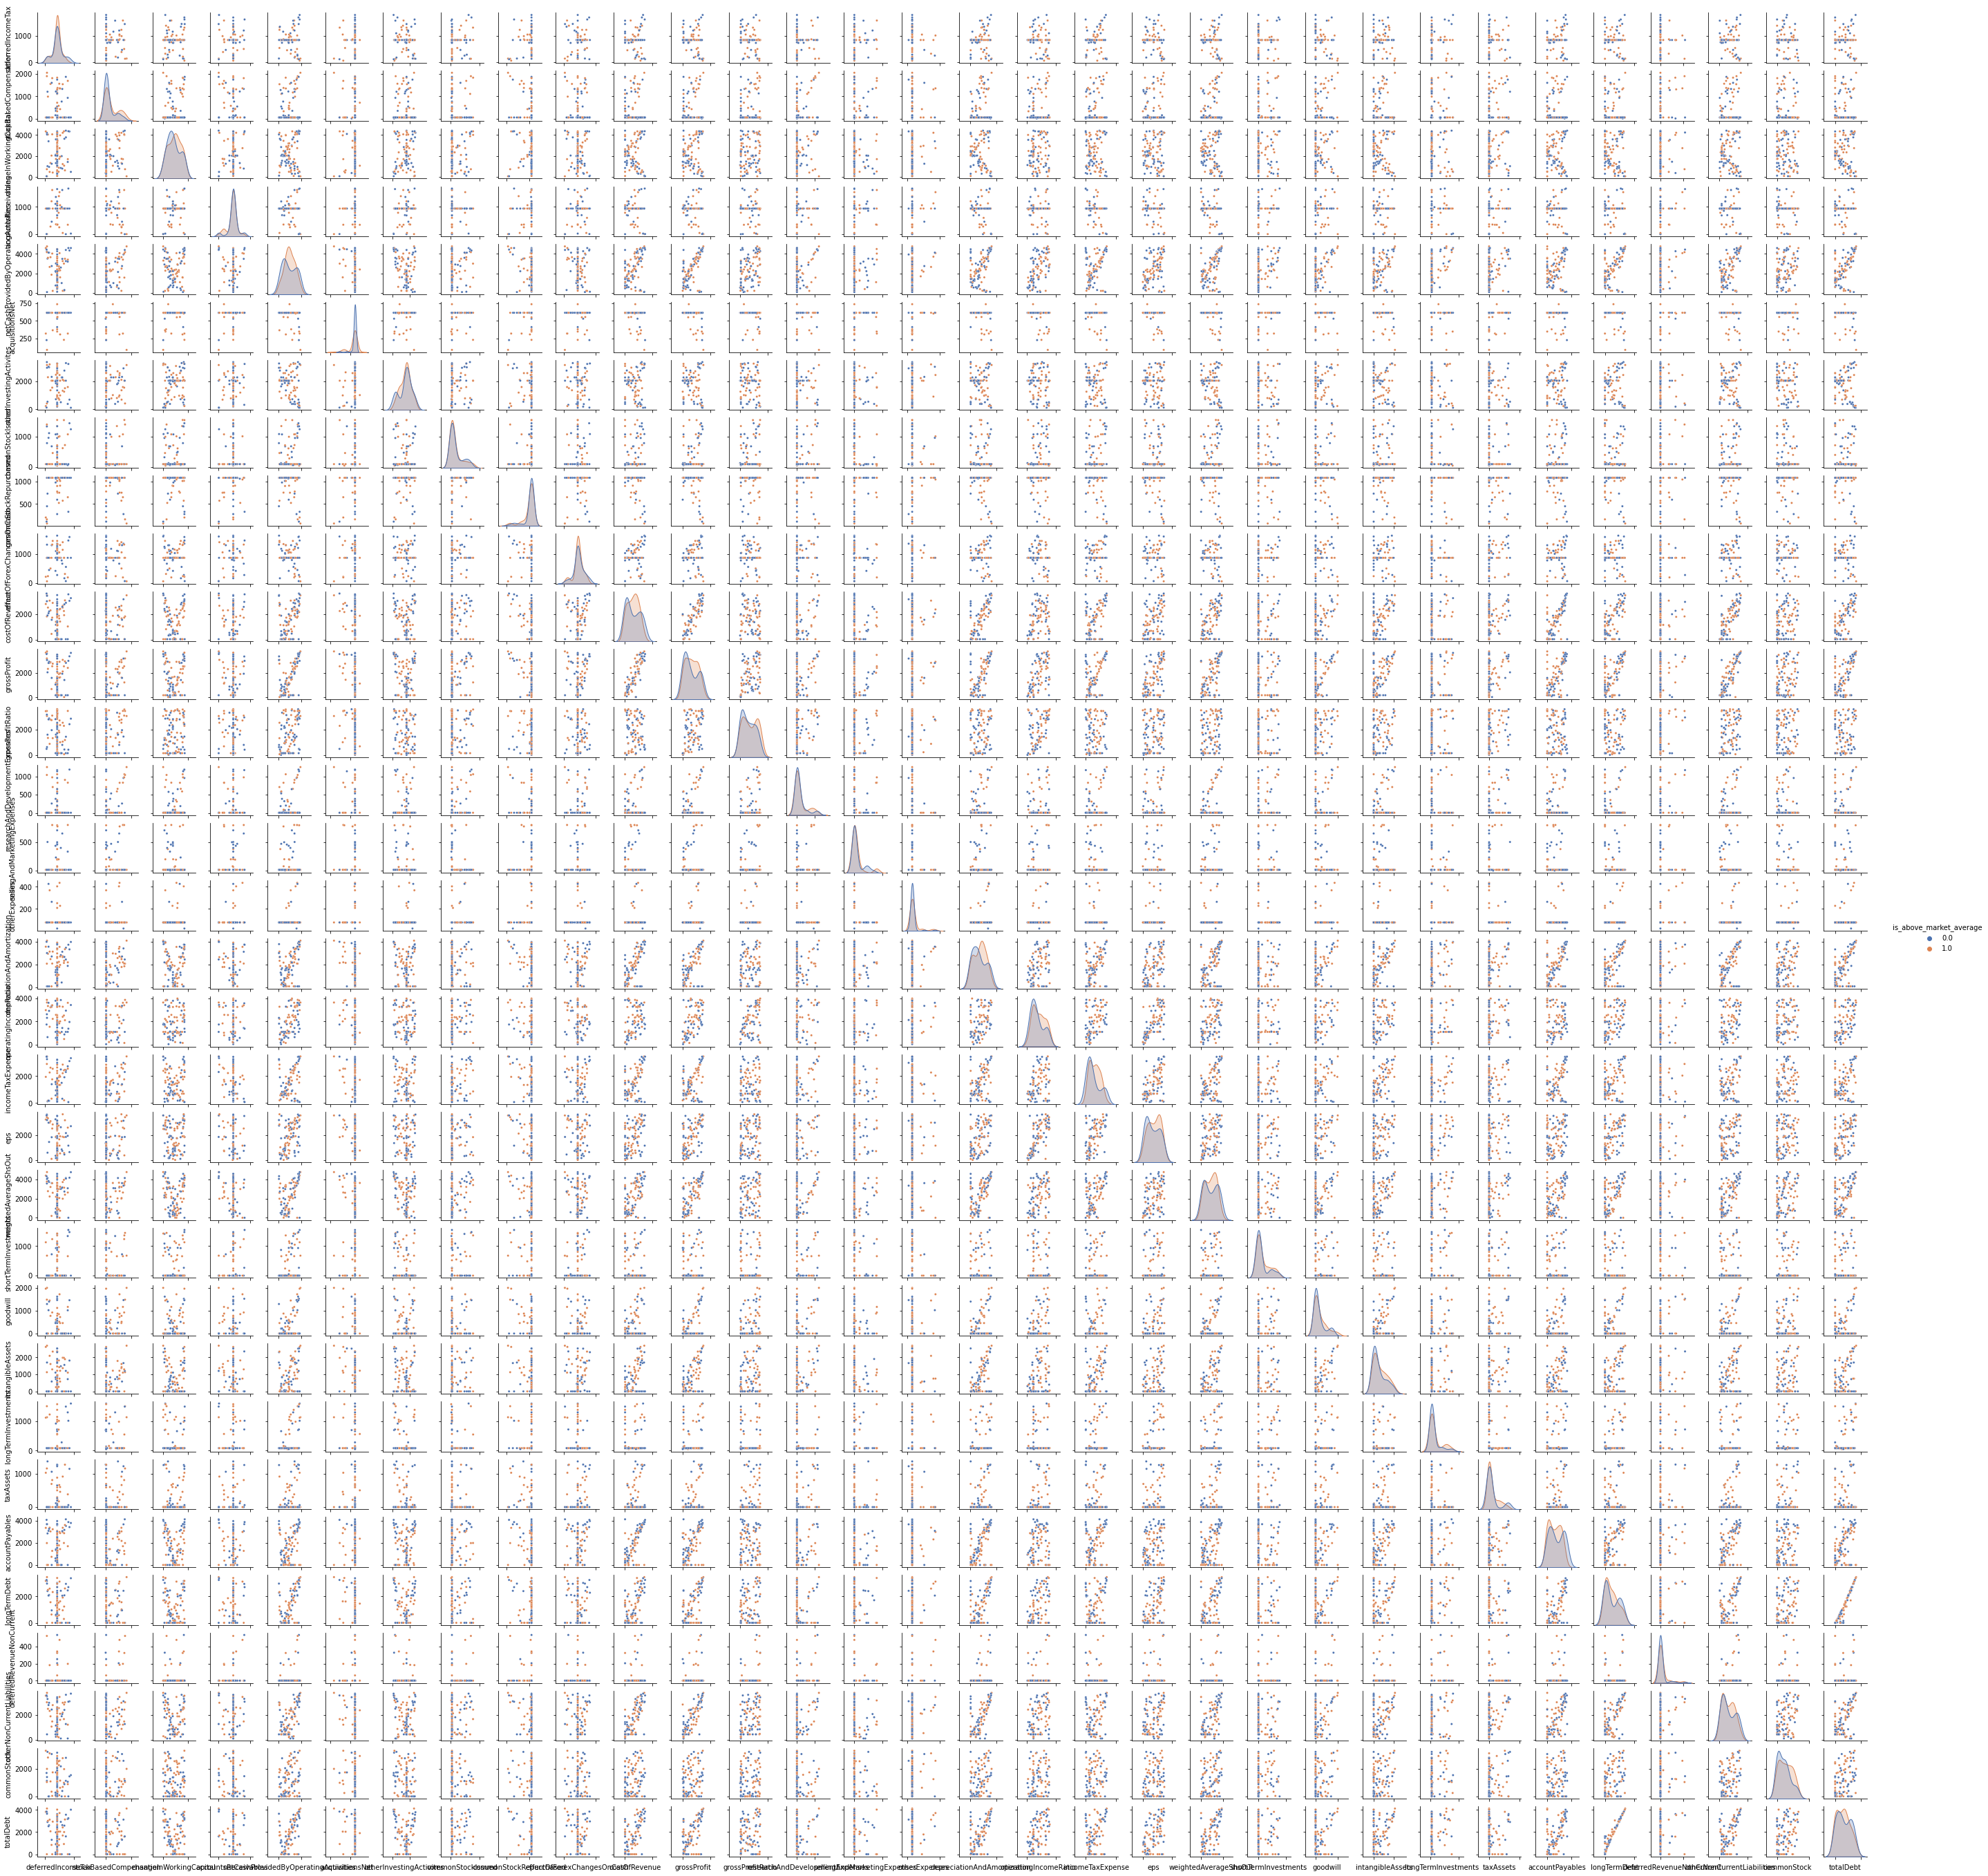

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
pairplot = sns.pairplot(sample, hue = 'is_above_market_average', palette = 'deep', height=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pairplot.set(xticklabels=[])

In [6]:
pairplot.savefig("test.jpg")

# K nearest neighbor classifier (is_above_market_average)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(CombinedDataFrame.drop(columns="is_above_market_average"), 
                                                    CombinedDataFrame["is_above_market_average"],test_size=0.10, 
                                                    random_state=1)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print (f" Accuracy for k-nn is {accuracy_score(y_test, knn_pred)}")

#accuracy generated = 0.5205087662186672


#get accuracy for each rating

#if we get an accuracy over 0.5 we should be millionairs, so why do we have one so good. let's look into it.



 Accuracy for k-nn is 0.5205087662186672


# Naive Bayes Guassian (is_above_market_average)

# K nearest neighbor classifier (rating 0-5)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print (f" Accuracy for k-nn is {accuracy_score(y_test, knn_pred)}")

#accuracy generated = 0.2531042180160908


#get accuracy for each rating

#if we get an accuracy over 0.5 we should be millionairs, so why do we have one so good. let's look into it.



In [32]:
#accuracy score for each rating (0-5)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, knn_pred)
matrix.diagonal()/matrix.sum(axis=1)

array([0.39622858, 0.24088512, 0.2573051 , 0.18598383, 0.18323451])

# He said we really need to dig down into our accuracies and analyze them

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(CombinedDataFrame.drop(columns="is_above_market_average"), 
                                                    CombinedDataFrame["is_above_market_average"],test_size=0.20, 
                                                    random_state=1)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

dtc = DecisionTreeClassifier(max_depth=5, random_state=0)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
print (f" Accuracy for Decision Tree is { accuracy_score(y_test, dtc_pred)}")

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)
#Make prediction on test dataset
predictions = naive_bayes.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))

In [ ]:
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print (f" Accuracy for Random Forest Classifier is {accuracy_score(y_test, rfc_pred)}")

In [ ]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
print (f" Accuracy for AdaBoost is { accuracy_score(y_test, ada_pred)}")

In [ ]:
svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
print (f" Accuracy for SVM is { accuracy_score(y_test, svc_pred)}")